# Final Project: Image classification using Convolutional Neural Network

## Shawon Dey

# Introduction

In this project, I used convolutional neural network to classify the images of Car and Airplane from a given set of Data. I used an established model. The convolutional neural network (CNN) is a class of deep learning neural networks. They are commonly used in image classification where image classification is the process of taking an input (like a picture) and outputting a class (like “cat”) or a probability that the input is a particular class (“there’s a 90% probability that this input is a cat”). A CNN has,
1. Convolutional layers
2. ReLU Layers
3. Pooling layers
4. A fully connected layer

A CNN convolves learned features with input data and uses 2D convolutional layers. This means that this type of network is ideal for processing 2D images. Compared to other image classification algorithms, CNNs actually use very little preprocessing. This means that they can learn the filters that have to be hand-made in other algorithms. CNNs can be used in tons of applications from image and video recognition, image classification, and recommender systems to natural language processing and medical image analysis.

A CNN works by extracting features from images. This eliminates the need for manual feature extraction. The features are not trained! They’re learned while the network trains on a set of images. This makes deep learning models extremely accurate for computer vision tasks. CNNs learn feature detection through tens or hundreds of hidden layers. Each layer increases the complexity of the learned features. starts with an input image, applies many different filters to it to create a feature map, applies a ReLU function to increase non-linearity, applies a pooling layer to each feature map, flattens the pooled images into one long vector, inputs the vector into a fully connected artificial neural network, processes the features through the network. The final fully connected layer provides the “voting” of the classes that we’re after, trains through forward propagation and backpropagation for many, many epochs. This repeats until we have a well-defined neural network with trained weights and feature detectors.

CNNs have an input layer, and output layer, and hidden layers. The hidden layers usually consist of convolutional layers, ReLU layers, pooling layers, and fully connected layers.

1. Convolutional layers apply a convolution operation to the input. This passes the information on to the next layer.
2. Pooling combines the outputs of clusters of neurons into a single neuron in the next layer.
3. Fully connected layers connect every neuron in one layer to every neuron in the next layer.

Convolutional Neural Network (CNN)


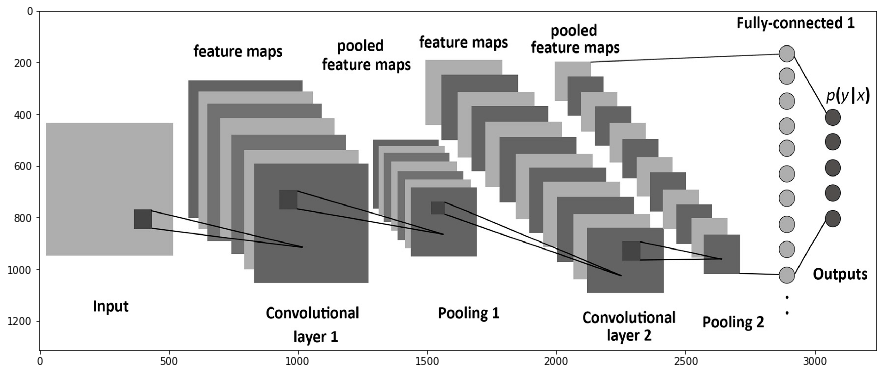

In [11]:
import matplotlib.pyplot as plt
from skimage import io
img= io.imread('images_after_testing/images_after_testing/convolution.png')
print("Convolutional Neural Network (CNN)")
plt.figure(figsize = (15,10))
imgplot = plt.imshow(img)
plt.show()


A large number of works have been done in image classification using convolutional neural network. In [1], the authors used medical image classification by using convolutional neural network. The authors of this paper [2], build a simple convolutional neural netork for image classification. I build a 3 layered CNN Image classifier to classify whether the given image is a image of Car or Airplane. They[3] proposed a CV-CNN which is tested on the typical polarimetric SAR image classification task which classifies each pixel into known terrain types via supervised training. For this project I collected 500 images each for both Car and Airplane. I make a folder named rawdata in the current working directory. Then I Create folders with their respective class names and put all the images in their respective folders. Also Run this file in the same directory as rawdata. This will resize all the images to a standard resolution and same format and put it in a new folder named data. 

Another important information is that, I started this project using spyder. I didn't notice that for final project I need to use jupyter nootbook also. But when I noticed and started using jupyter, I found that some of my code was not working in jupyter. I didn't have that time to start it from begining. So I just copied all of my codes and pasted in here. But I also include spyder file. So you can run and verify the project. I also print some results from spyder for your convenient.

### Modeling
In this section I created a file named Class_model in spyder where I created some function. add_weights function with parameter shape return a a connection of the given shape with some random initialised values whenever it is called. tf.truncated_normal is used to generate more randomized initial values for that shape. add_biases with the same parameter shape initialised with some constant for that shape. Returns bias variable. Convolution occurs in conv_layer. Pooling layer use the Parameters previous_layer, kernel, stride. flattening_layer converts all multidimensional matrices into a single dimension. fully_connected_layer connects the previous layer with the output layer. In activation_layer, we use Rectified linear unit Relu. it's the standard activation layer used.

In [1]:
import tensorflow as tf
import cv2
import os


class model_tools:
    # Defined functions for all the basic tensorflow components that we needed for building a model.
    # function definitions are in the respective comments

    def add_weights(self,shape):
        # a common method to create all sorts of weight connections
        # takes in shapes of previous and new layer as a list e.g. [2,10]
        # starts with random values of that shape.
        return tf.Variable(tf.truncated_normal(shape=shape, stddev=0.05))

    def add_biases(self,shape):
        # a common method to add create biases with default=0.05
        # takes in shape of the current layer e.g. x=10
        return tf.Variable(tf.constant(0.05, shape=shape))

    def conv_layer(self,layer, kernel, input_shape, output_shape, stride_size):
        #convolution occurs here.
        #create weights and biases for the given layer shape
        weights = self.add_weights([kernel, kernel, input_shape, output_shape])
        biases = self.add_biases([output_shape])
        #stride=[image_jump,row_jump,column_jump,color_jump]=[1,1,1,1] mostly
        stride = [1, stride_size, stride_size, 1]
        #does a convolution scan on the given image
        layer = tf.nn.conv2d(layer, weights, strides=stride, padding='SAME') + biases
        return layer

    def pooling_layer(self,layer, kernel_size, stride_size):
        # basically it reduces the complexity involved by only taking the important features alone
        # many types of pooling is there.. average pooling, max pooling..
        # max pooling takes the maximum of the given kernel
        #kernel=[image_jump,rows,columns,depth]
        kernel = [1, kernel_size, kernel_size, 1]
        #stride=[image_jump,row_jump,column_jump,color_jump]=[1,2,2,1] mostly
        stride = [1, stride_size, stride_size, 1]
        return tf.nn.max_pool(layer, ksize=kernel, strides=stride, padding='SAME')

    def flattening_layer(self,layer):
        #make it single dimensional
        input_size = layer.get_shape().as_list()
        new_size = input_size[-1] * input_size[-2] * input_size[-3]
        return tf.reshape(layer, [-1, new_size]),new_size

    def fully_connected_layer(self,layer, input_shape, output_shape):
        #create weights and biases for the given layer shape
        weights = self.add_weights([input_shape, output_shape])
        biases = self.add_biases([output_shape])
        #most important operation
        layer = tf.matmul(layer,weights) + biases  # mX+b
        return layer

    def activation_layer(self,layer):
        # we use Rectified linear unit Relu. it's the standard activation layer used.
        # there are also other layer like sigmoid,tanh..etc. but relu is more efficent.
        # function: 0 if x<0 else x.
        return tf.nn.relu(layer)
    
    

def image_processing(raw_data,data_path,height,width):
    class_labels=[]
    category_count=0
    for i in os.walk(raw_data):
        if len(i[2])>0:
            counter=0
            images=i[2]
            class_name=i[0].strip('\\')
            print(class_name)
            path=os.path.join(data_path,class_labels[category_count])
            for image in images:
                im=cv2.imread(class_name+'\\'+image)
                im=cv2.resize(im,(height,width))
                if not os.path.exists(path):
                    os.makedirs(path)
                cv2.imwrite(os.path.join(path,str(counter)+'.jpg'),im)
                counter+=1
            category_count+=1
        else:
            number_of_classes=len(i[1])
            print(number_of_classes,i[1])
            class_labels=i[1][:]

if __name__=='__main__':
    height = 100
    width = 100
    raw_data = 'rawdata'
    data_path = 'data'
    if not os.path.exists(data_path):
        image_processing(raw_data, data_path, height, width)

### Some examples of car and airplane from the data set


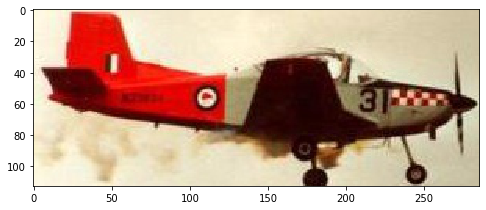

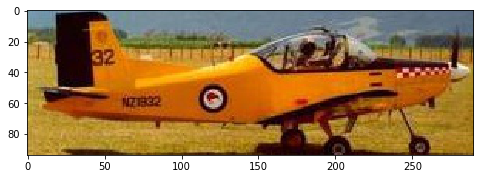

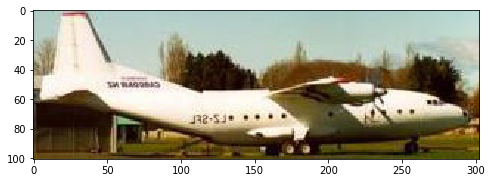

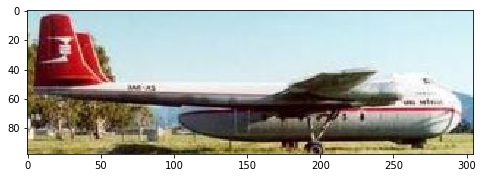

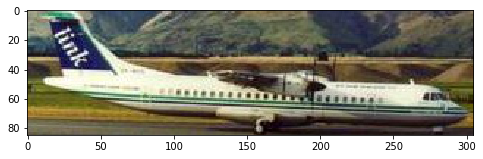

In [26]:
Test_air = ['airplane_0001','airplane_0002','airplane_0003','airplane_0004','airplane_0005','airplane_0006','airplane_0007',
                    'airplane_0008','airplane_0009','airplane_0010','airplane_0011','airplane_0012','airplane_0013','airplane_0014']

for i in range(5):
    img= io.imread('rawdata/airplane/'+str(Test_air[i])+'.jpg')
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.show()

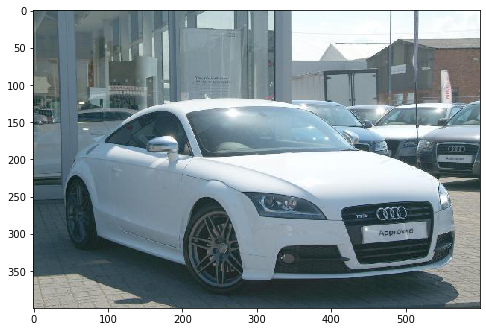

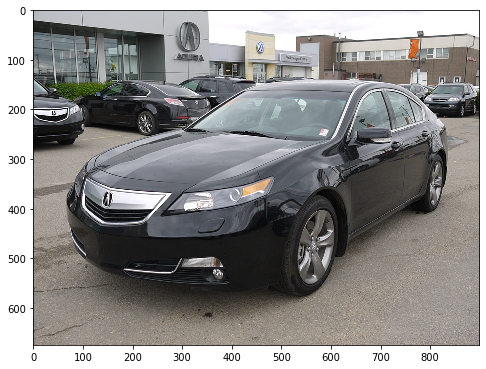

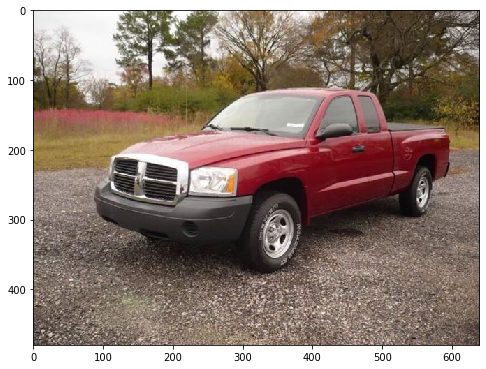

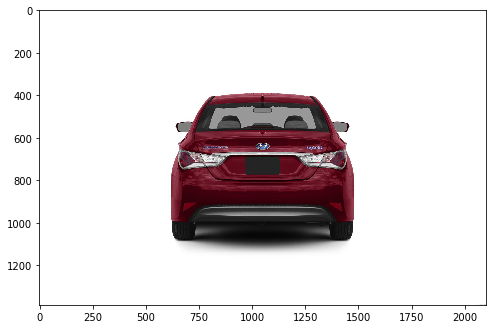

In [30]:
Test_car = ['00001','00002','00003','00004','00005','00006','00007','00008','00009','00010','00011','00012','00013','00014']

for i in range(4):
    img= io.imread('rawdata/car/'+str(Test_car[i])+'.jpg')
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.show()

### Architecture

Now we have to put all the elements that we have seen above in a way to make it work for us.
A neural network is a black box, we won’t have any control over what happens inside those connections. but at each layer, we can get insights through which it is possible for us to calculate what combination of sequence of these functions will give us good results. We use a standard architecture which is found in most successful models.

In our architecture, we have 3 convolutional layers.

In [ ]:
from Class_model import model_tools
import tensorflow as tf
model=model_tools()

def My_model(images_ph,number_of_classes):
    #MODEL ARCHITECTURE:
    #level 1 convolution
    network=model.conv_layer(images_ph,5,3,16,1)
    network=model.pooling_layer(network,5,2)
    network=model.activation_layer(network)
    print(network)

    #level 2 convolution
    network=model.conv_layer(network,4,16,32,1)
    network=model.pooling_layer(network,4,2)
    network=model.activation_layer(network)
    print(network)

    #level 3 convolution
    network=model.conv_layer(network,3,32,64,1)
    network=model.pooling_layer(network,3,2)
    network=model.activation_layer(network)
    print(network)

    #flattening layer
    network,features=model.flattening_layer(network)
    print(network)

    #fully connected layer
    network=model.fully_connected_layer(network,features,1024)
    network=model.activation_layer(network)
    print(network)

    #output layer
    network=model.fully_connected_layer(network,1024,number_of_classes)
    print(network)
    return network


if __name__== "__main__":
    images_ph = tf.placeholder(tf.float32, shape=[None, 100,100,3])
    generate_model(images_ph,2)

### Training

We have built our network. Now it is time to pass in some data and get those neurons fired. We have 500s of images. Even though they are small in size, it is complex enough as it goes deep. So, we divide our images into small batches and send it to network. One complete cycle of all the images passed through the network remarks an epoch. Our network cannot learn all the features of an image at once, it needs to see it multiple times and also compare it all the other images that it have seen and decide which set of features of the image made it as a class A image or a class B image. “Show and Teach” We show the network this is an image of a dog and ask it to learn features of these over iterations and comparing with the original image. Comparison is nothing but how different the predicted value is to the expected output. we calculate that using Squared Error.
We are going to use softmax cross entropy which is basically like finding squared error but this is more efficient and better.
We found errors for individual images now we can average it and get the total error rate. It is also known as cost.
Now, we need to reduce this cost using some learning technique. Reducing the cost means what particular set of neurons should be fired in order that error is minimum. So, we have many variables(neurons) which should be optimized. There are many optimizers but it all began with the virtous Gradient Descent. We are going to use an advanced technique as Gradient descent is old and slower. Adam Optimizer, It is almost the best choice in all kinds of networks and optimization. So, the image placeholder will have the images for that batch size and we are going to run our network using the Adam Optimizer with our image data. The code is given below with explanation of comments

In [ ]:
import tensorflow as tf
import os
from utils import utils
from build_model import model_tools
import model_architecture
from tensorflow.python.client import device_lib

tf.keras.backend.clear_session()

print(device_lib.list_local_devices())
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

session=tf.Session()
#create Placeholders for images and labels
images_ph=tf.placeholder(tf.float32,shape=[None,height,width,color_channels])
labels_ph=tf.placeholder(tf.float32,shape=[None,number_of_classes])

#training happens here
def trainer(network,number_of_images):
    #find error like squared error but better
    cross_entropy=tf.nn.softmax_cross_entropy_with_logits_v2(logits=network,labels=labels_ph)

    #now minize the above error
    #calculate the total mean of all the errors from all the nodes
    cost=tf.reduce_mean(cross_entropy)
    tf.summary.scalar("cost", cost)#for tensorboard visualisation

    #Now backpropagate to minimise the cost in the network.
    optimizer=tf.train.AdamOptimizer().minimize(cost)
    #print(optimizer)
    session.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(model_save_name, graph=tf.get_default_graph())
    merged = tf.summary.merge_all()
    saver = tf.train.Saver(max_to_keep=4)
    counter=0
    for epoch in range(epochs):
        tools = utils()
        for batch in range(int(number_of_images / batch_size)):
            counter+=1
            images, labels = tools.batch_dispatch()
            if images == None:
                break
            loss,summary = session.run([cost,merged], feed_dict={images_ph: images, labels_ph: labels})
            print('loss', loss)
            session.run(optimizer, feed_dict={images_ph: images, labels_ph: labels})

            print('Epoch number ', epoch, 'batch', batch, 'complete')
            writer.add_summary(summary,counter)
        saver.save(session, "./trained/trained_variables.ckpt")
if __name__=="__main__":
    tools=utils()
    model=model_tools()
    network=model_architecture.generate_model(images_ph,number_of_classes)
    print (network)
    number_of_images = sum([len(files) for r, d, files in os.walk("data")])
    trainer(network,number_of_images)

After the training is over, a folder checkpoint is created. We have three files in our checkpoints folder,
.meta file — it has your graph structure saved.
.index — it identifies the respective checkpoint file.
.data — it stores the values of all the variables.

To run a simple prediction,
Edit the image name in predict.py.
Download the model files and extract in the same folder.
Run predict.py.

In [ ]:
import cv2
import tensorflow as tf
import os
import sys
import numpy as np
from build_model import model_tools

model=model_tools()
model_folder='checkpoints'
#image=sys.argv[1]
#img=cv2.imread(image)
#img=cv2.imread('raw_traffic_light/traffic_light_images/test/green/00febbe1-a9ae-4b5f-b682-8ebfdae485a3.jpg')
#img=cv2.imread('test_set/cats/cat.4001.jpg')
#img=cv2.imread('test_set/Boat/img_0.png')
img=cv2.imread('test_set/car/car_0575.jpg')
#img=cv2.imread('rawdata/superman/superman_00b89e7d-b40c-47ea-be96-8e9c0b7dcaf7.png')
session=tf.Session()
img=cv2.resize(img,(100,100))
img=img.reshape(1,100,100,3)
labels = np.zeros((1, 2))

#Create a saver object to load the model
#saver = tf.train.import_meta_graph(os.path.join(model_folder,'.meta'))
saver = tf.train.import_meta_graph("trained/trained_variables.ckpt.meta")

#restore the model from our checkpoints folder

#Uncomment the following line for running on a windows machine
#saver.restore(session,os.path.join(model_folder,'.\\'))
saver.restore(session,"trained/trained_variables.ckpt")

#The following line is for running on a linux machine, comment it out if running on a windows machine
#saver.restore(session,os.path.join(model_folder,'./'))

#Create graph object for getting the same network architecture
graph = tf.get_default_graph()

#Get the last layer of the network by it's name which includes all the previous layers too
network = graph.get_tensor_by_name("add_4:0")

#create placeholders to pass the image and get output labels
im_ph= graph.get_tensor_by_name("Placeholder:0")
label_ph = graph.get_tensor_by_name("Placeholder_1:0")

#Inorder to make the output to be either 0 or 1.
network=tf.nn.sigmoid(network)

# Creating the feed_dict that is required to be fed to calculate y_pred
feed_dict_testing = {im_ph: img, label_ph: labels}
result=session.run(network, feed_dict=feed_dict_testing)

if result[0][0]>0.5:
 	print("Airplane!")
else:
 	print("Car!")

print(result)


### After the training, we save some results in images_after_testing folder. Also its showing the accuracy or confident of detecting the image.

Name of the Test image and the accuracy of classification


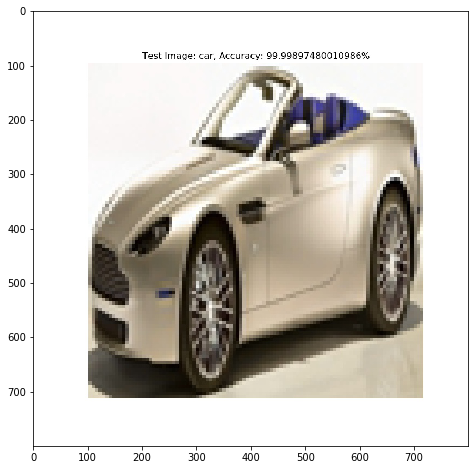

Name of the Test image and the accuracy of classification


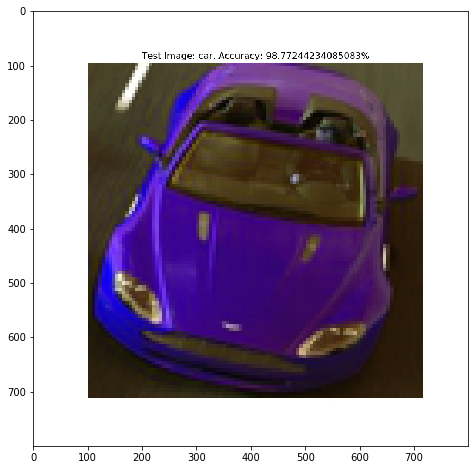

Name of the Test image and the accuracy of classification


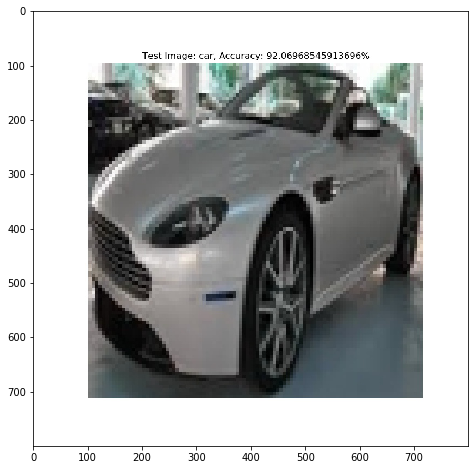

In [3]:
import matplotlib.pyplot as plt
from skimage import io

Test_car = ['test1','test2','test3','test4','test5','test6','test7','test8','test9',
                    'test10','test11','test12','test13','test14','test15','test16','test17']

for i in range(3):
    img= io.imread('images_after_testing/images_after_testing/CAR/'+str(Test_car[i])+'.jpg')
    print("Name of the Test image and the accuracy of classification")
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.show()

Name of the Test image and the accuracy of classification


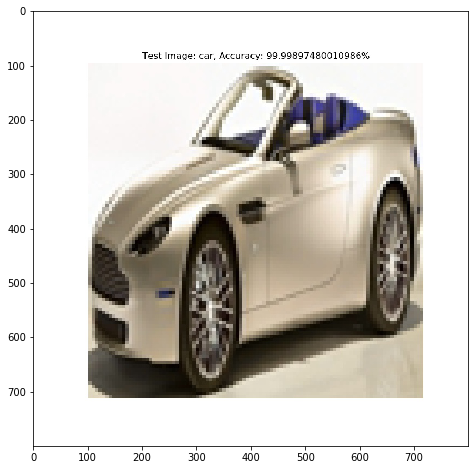

Name of the Test image and the accuracy of classification


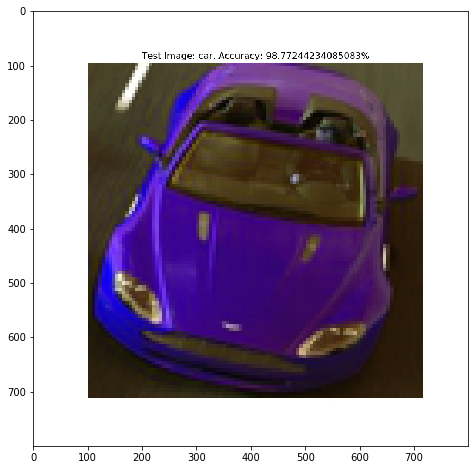

Name of the Test image and the accuracy of classification


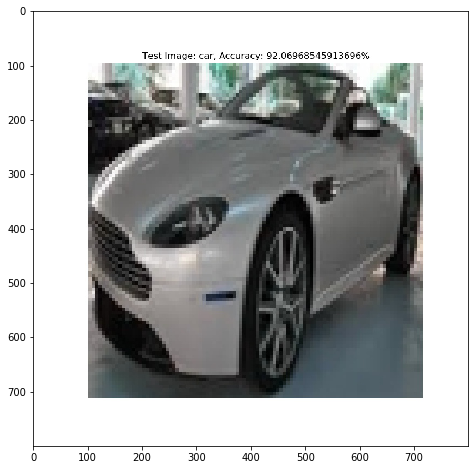

Name of the Test image and the accuracy of classification


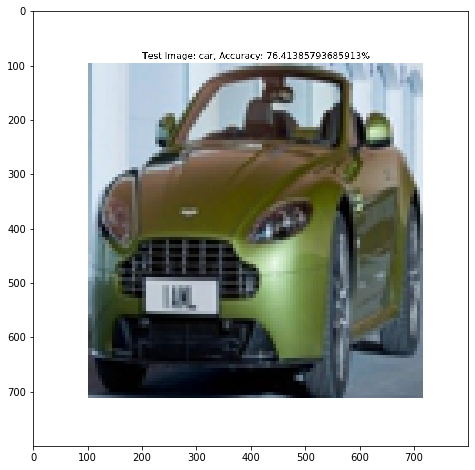

Name of the Test image and the accuracy of classification


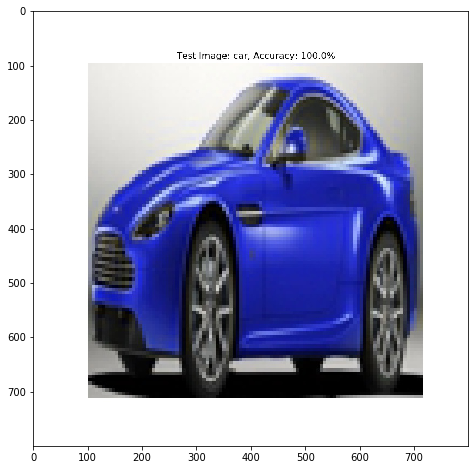

Name of the Test image and the accuracy of classification


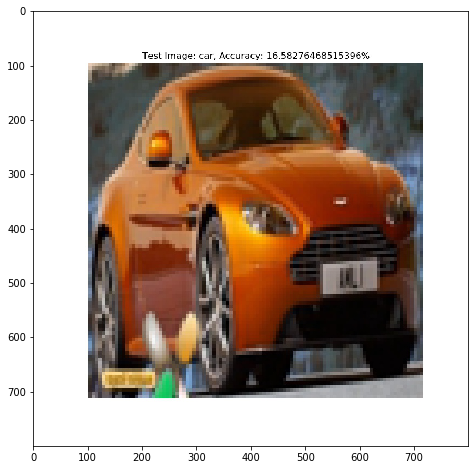

Name of the Test image and the accuracy of classification


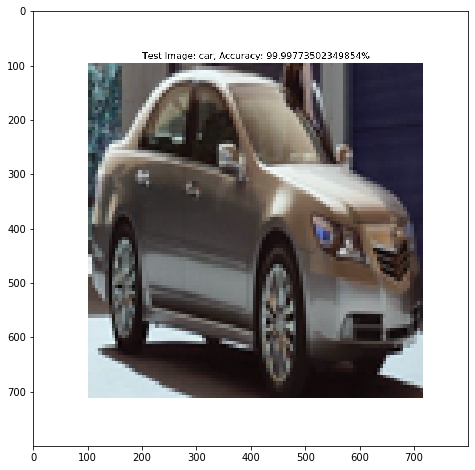

Name of the Test image and the accuracy of classification


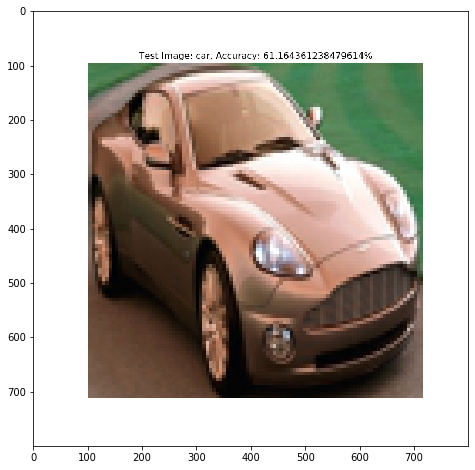

Name of the Test image and the accuracy of classification


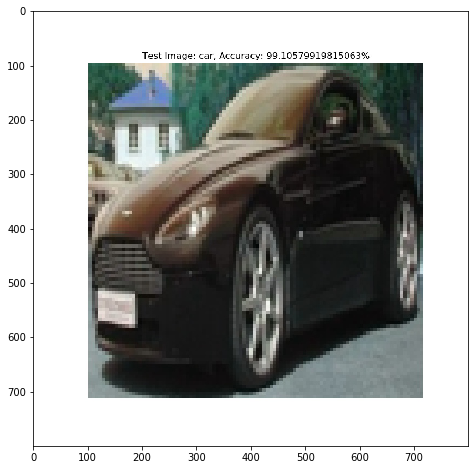

Name of the Test image and the accuracy of classification


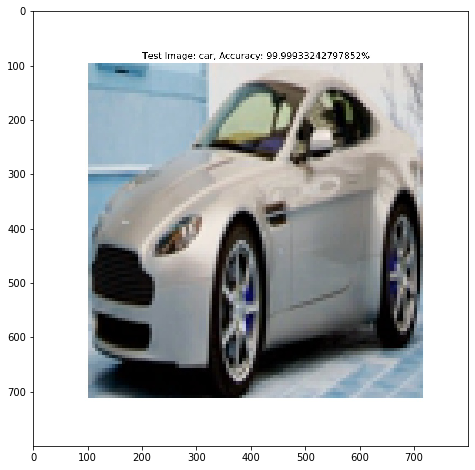

Name of the Test image and the accuracy of classification


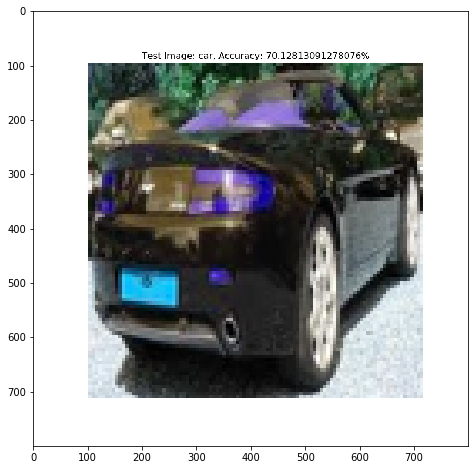

Name of the Test image and the accuracy of classification


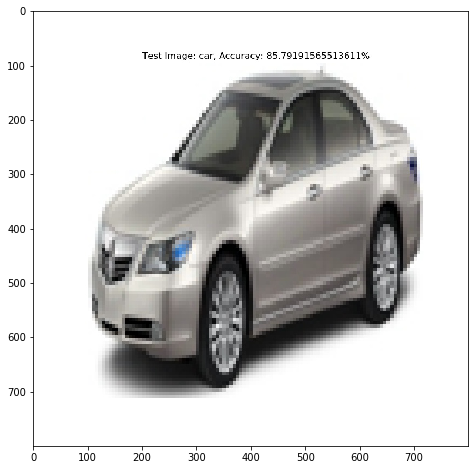

Name of the Test image and the accuracy of classification


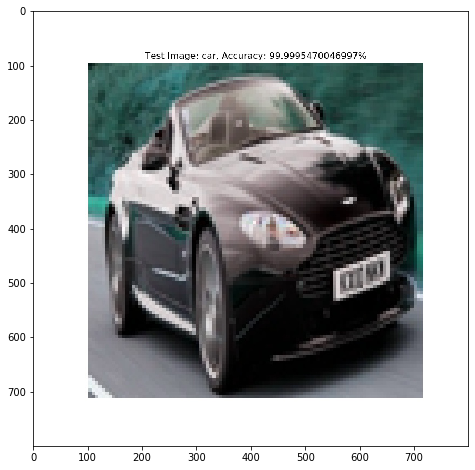

Name of the Test image and the accuracy of classification


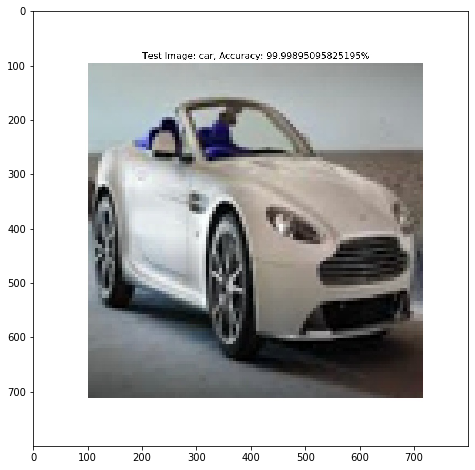

Name of the Test image and the accuracy of classification


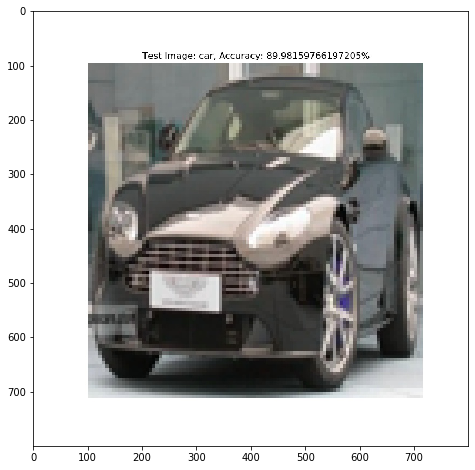

Name of the Test image and the accuracy of classification


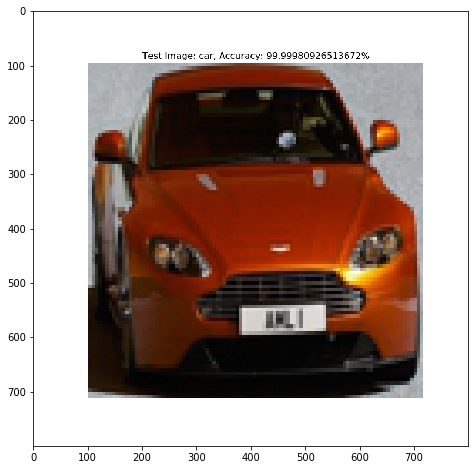

In [4]:
import matplotlib.pyplot as plt
from skimage import io

Test_car = ['test1','test2','test3','test4','test5','test6','test7','test8','test9',
                    'test10','test11','test12','test13','test14','test15','test16','test17']

for i in range(16):
    img= io.imread('images_after_testing/images_after_testing/CAR/'+str(Test_car[i])+'.jpg')
    print("Name of the Test image and the accuracy of classification")
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.show()

Name of the Test image and the accuracy of classification


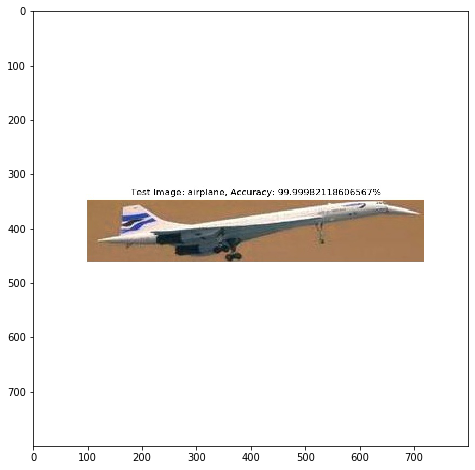

Name of the Test image and the accuracy of classification


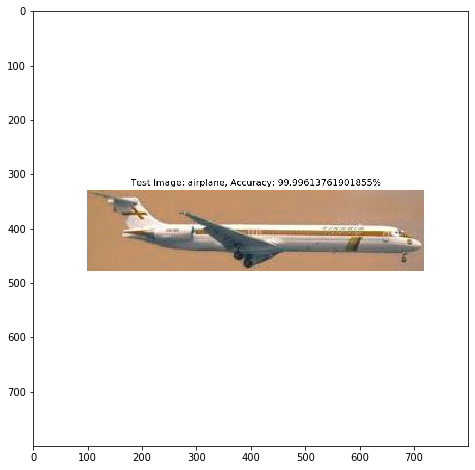

Name of the Test image and the accuracy of classification


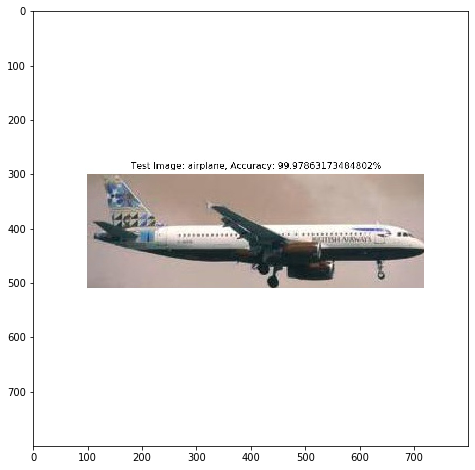

In [6]:
import matplotlib.pyplot as plt
from skimage import io

Test_air = ['test1','test2','test3','test4','test5','test6','test7','test8','test9',
                    'test10','test11','test12','test13','test14','test15','test16','test17','test18','test19']

for i in range(3):
    img= io.imread('images_after_testing/images_after_testing/Airplane/'+str(Test_air[i])+'.jpg')
    print("Name of the Test image and the accuracy of classification")
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.show()

Name of the Test image and the accuracy of classification


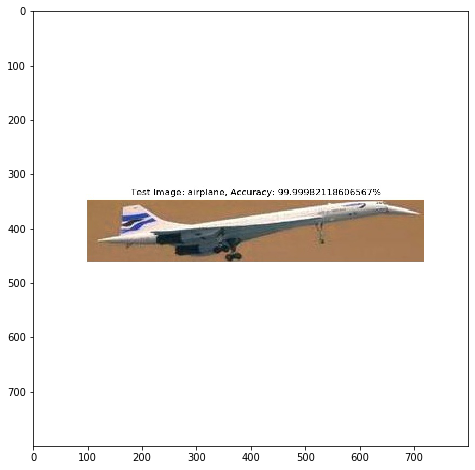

Name of the Test image and the accuracy of classification


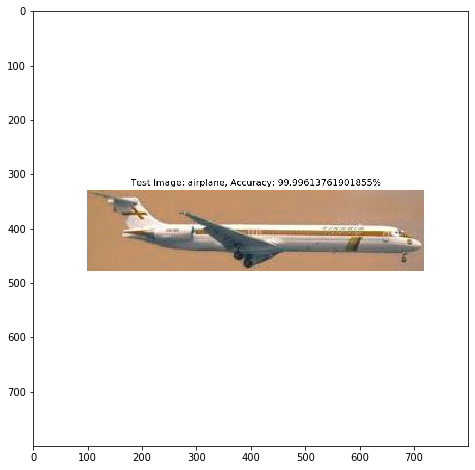

Name of the Test image and the accuracy of classification


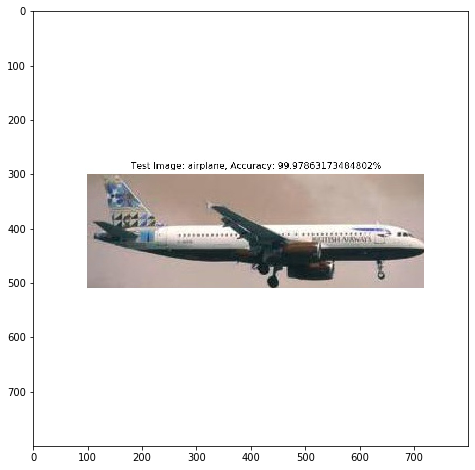

Name of the Test image and the accuracy of classification


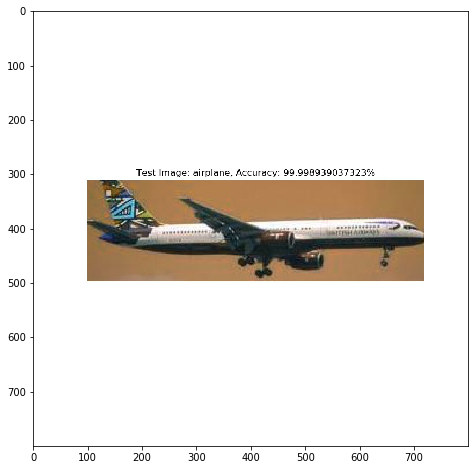

Name of the Test image and the accuracy of classification


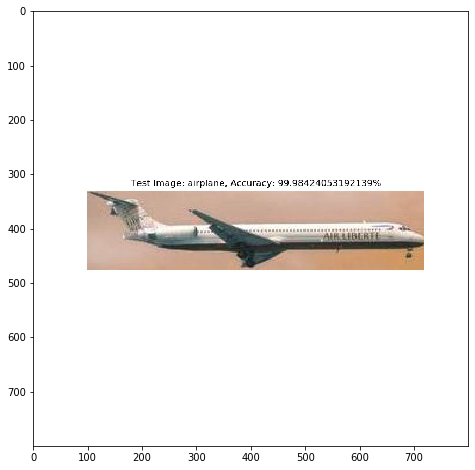

Name of the Test image and the accuracy of classification


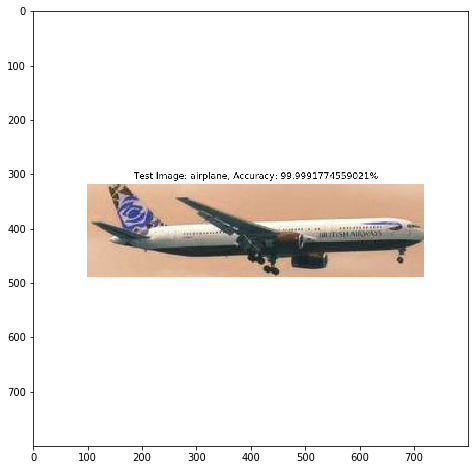

Name of the Test image and the accuracy of classification


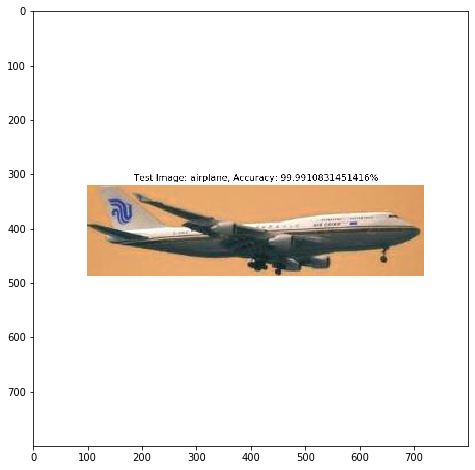

Name of the Test image and the accuracy of classification


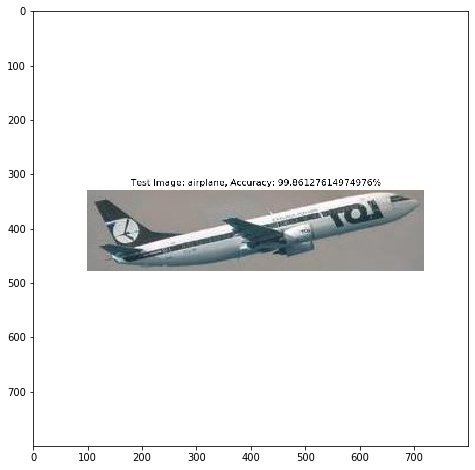

Name of the Test image and the accuracy of classification


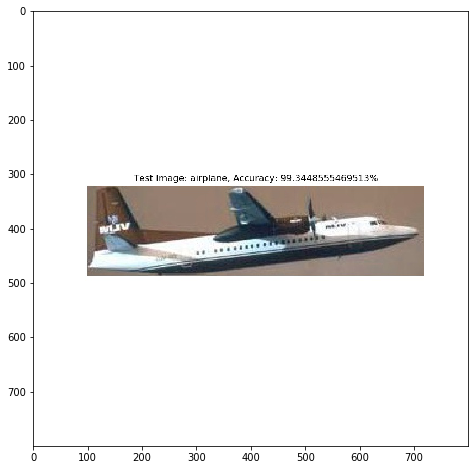

Name of the Test image and the accuracy of classification


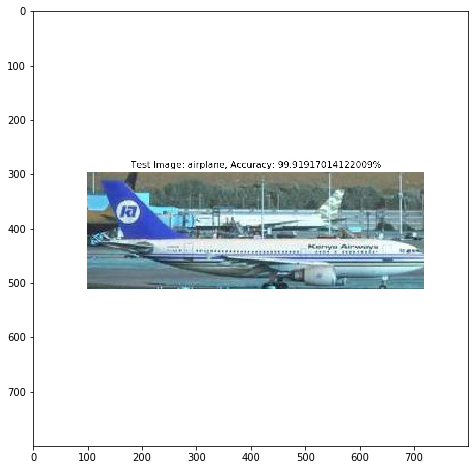

Name of the Test image and the accuracy of classification


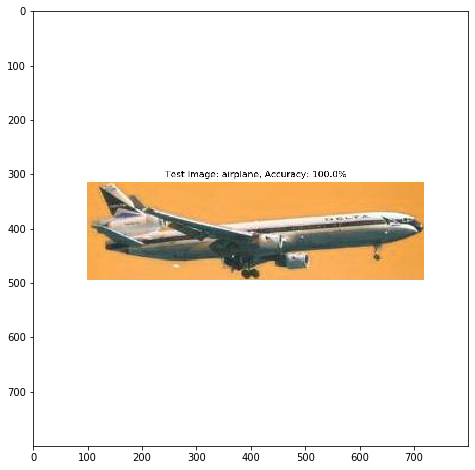

Name of the Test image and the accuracy of classification


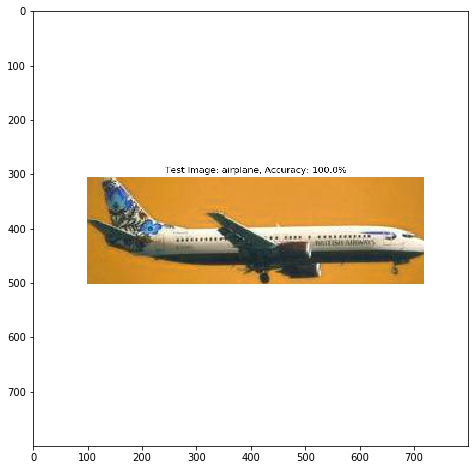

Name of the Test image and the accuracy of classification


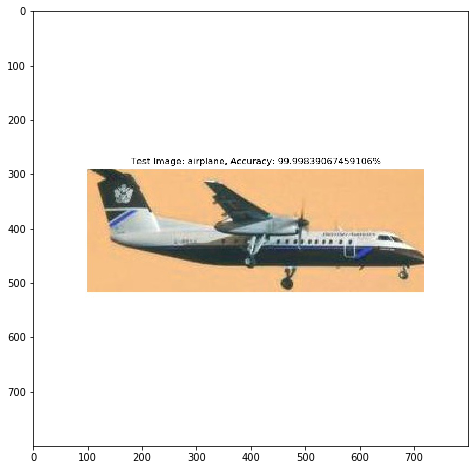

Name of the Test image and the accuracy of classification


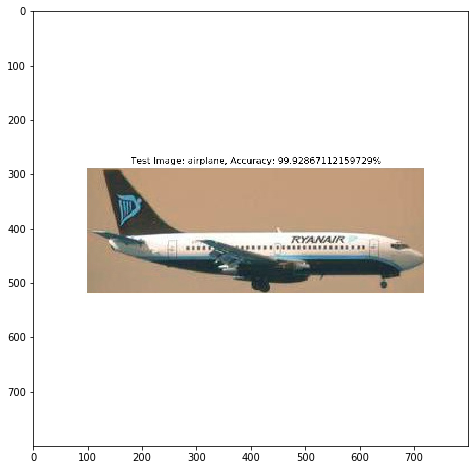

Name of the Test image and the accuracy of classification


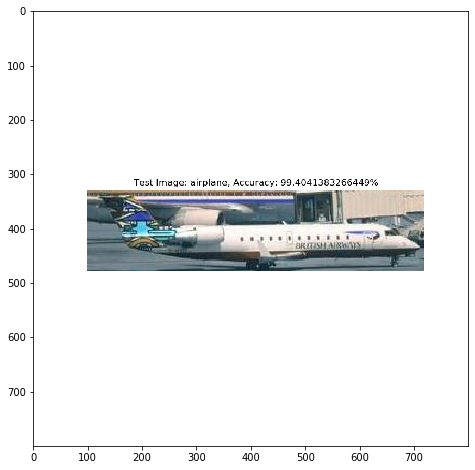

Name of the Test image and the accuracy of classification


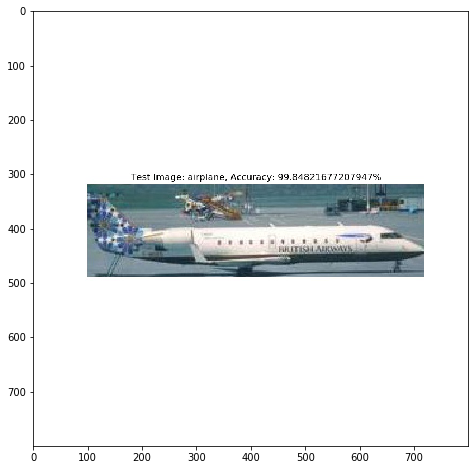

Name of the Test image and the accuracy of classification


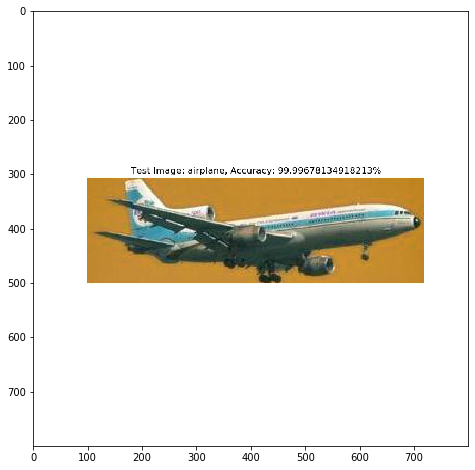

Name of the Test image and the accuracy of classification


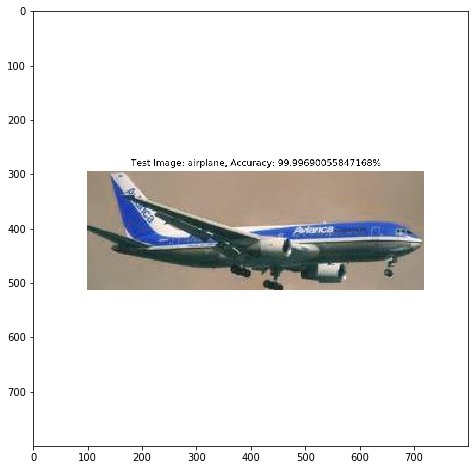

Name of the Test image and the accuracy of classification


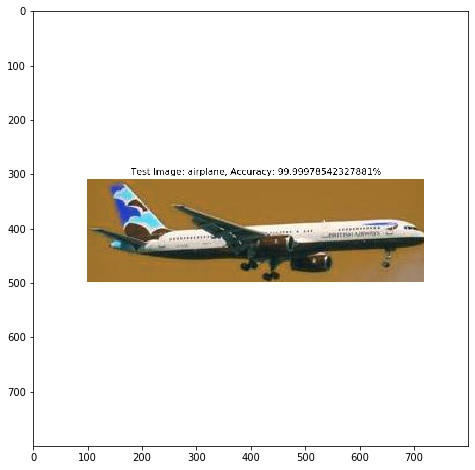

In [7]:
import matplotlib.pyplot as plt
from skimage import io

Test_air = ['test1','test2','test3','test4','test5','test6','test7','test8','test9',
                    'test10','test11','test12','test13','test14','test15','test16','test17','test18','test19']

for i in range(19):
    img= io.imread('images_after_testing/images_after_testing/Airplane/'+str(Test_air[i])+'.jpg')
    print("Name of the Test image and the accuracy of classification")
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.show()

After the training of all images, We use the test_set to get some results of 100 cars and 100 airplanes. Overall performance was good with a number of 10 images out of 200 which are misclassified.

Number of Misclassified images


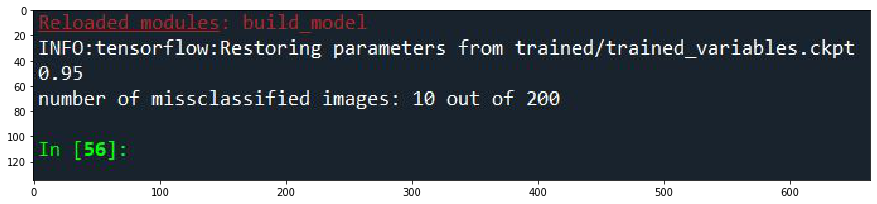

In [37]:
img= io.imread('images_after_testing/images_after_testing/Capture.jpg')
print("Number of Misclassified images")
plt.figure(figsize = (15,10))
imgplot = plt.imshow(img)
plt.show()

### Result
The accuracy of the classification using CNN is pretty good. Despite some exception, this model classify the images with above 90% accuracy.

## References

1. Qing Li; Weidong Cai ; Xiaogang Wang ; Yun Zhou ; David Dagan Feng ; Mei Chen, "Medical image classification with convolutional neural network," in proc International Conference on Control Automation Robotics & Vision (ICARCV), 2014.
2. Tianmei Guo ; Jiwen Dong ; Henjian Li ; Yunxing Gao, "Simple convolutional neural network on image classification," IEEE 2nd International Conference on Big Data Analysis (ICBDA), 2017.
3. Zhimian Zhang ; Haipeng Wang  ; Feng Xu  ; Ya-Qiu Jin, "Complex-Valued Convolutional Neural Network and Its Application in Polarimetric SAR Image Classification," IEEE Transactions on Geoscience and Remote Sensing, vol. 55, pp. 7177 - 7188, 2017.
3. https://github.com/perseus784/BvS